# Convertir el excel en dataframe 

In [1]:
# Obtener de los dos archivos excel 
# y juntar las bases de datos en un mismo dataframe
import pandas as pd 
df1 = pd.read_excel('210_SIVIGILA Escritorio_01042008-30042023.xls')
df2 = pd.read_excel('210_SIVIGILAweb_01052023-06082024 (1).xls')
df = pd.concat([df1, df2], ignore_index=True)
df.shape

(5300, 121)

In [2]:
# 2. Ordenar los datos de acuerdo a los atributos de año y semana epidemiológica
df = df.sort_values(by=['semana', 'año'])
df.shape

(5300, 121)

In [3]:
# Detección y eliminación de caracteres no implimibles en el dataset
import re

# Expresión regular para encontrar caracteres no imprimibles
illegal_char_re = re.compile(r'[\x00-\x1F\x7F-\x9F]')

def find_illegal_chars(df):
    for col in df.columns:
        for idx, val in df[col].items():
            if isinstance(val, str) and illegal_char_re.search(val):
                print(f"Carácter ilegal encontrado en fila {idx}, columna '{col}': {repr(val)}")


# corregir aquí 
def remove_illegal_chars(val):
    if isinstance(val, str):
        return illegal_char_re.sub('', val)
    return val

df = df.map(remove_illegal_chars)
df.shape 



(5300, 121)

# Exploración de los problemas que tiene el atributo bar_ver_

1. Hay 463 subcategorias en bar_ver_ por errores en la recogida de datos, siendo que solo son 42    los barrios correctos. 
2. Hay 3125 datos faltantes en el atributo bar_ver_ 
3. 7 cadenas convertibles a enteros en el atributo bar_ver_
4. Un dato de tipo entero en el atributo de tipo `str` bar_ver_
5. lista_barrios_correctos = ['PUEBLO NUEVO', 'CENTENARIO', \
                          'LAS VILLAS', 'EL TRIÁNGULO', 'EL BOSQUE', \
                          'PUEBLO SANTO', 'LOS ALMENDROS', 'EL DROMEDARIO', \
                          'EL CENTRO', 'VILLA ARABIA', 'CARACOLÍ', \
                          'VILLA GRANDA', 'ASOVIVIENDA', 'EL KENNEDY', \
                          'CLEMENTE ARRIETA', 'EL ÁGUILA', 'EL POBLADO', \
                          'SANTA ELENA', 'EL CAMELLO', 'LA ESPERANZA', \
                          'EL PRADO', 'SAN MIGUEL', 'SAN RAFAEL', \
                          'LA PAZ', 'LAS MALVINAS', 'EL CARMEN', \
                          'NUEVA ESTRELLA', 'LOMA FRESCA', 'EL ROBLE', \
                          'LA COLOMBIANITA', 'PARAGUAY', 'LA YE', \
                          'ALTOS DE SAN JUAN', 'PUERTO ESPAÑA', 'EL PALMAR', \
                          'LAS GAVIOTAS', 'ALTOS DE KIRIQUI', 'CASTILLITO', \
                          'LOS CÓRDOBA', 'EL LAGO', 'BUENO AIRES', \
                          'PEDRO VALDIVIA', 'SIN INFORMACION']
6. get_close_matches()                           

In [4]:
# corrección completa del atributo bar_ver_
import pandas as pd
from difflib import get_close_matches

# Supongamos que df es tu dataframe y ya está cargado con los datos
# lista de barrios correctos
lista_barrios_correctos = ['PUEBLO NUEVO', 'CENTENARIO', 'LAS VILLAS', 'EL TRIÁNGULO', 'EL BOSQUE', 
                           'PUEBLO SANTO', 'LOS ALMENDROS', 'EL DROMEDARIO', 'EL CENTRO', 'VILLA ARABIA', 
                           'CARACOLÍ', 'VILLA GRANDA', 'ASOVIVIENDA', 'EL KENNEDY', 'CLEMENTE ARRIETA', 
                           'EL ÁGUILA', 'EL POBLADO', 'SANTA ELENA', 'EL CAMELLO', 'LA ESPERANZA', 
                           'EL PRADO', 'SAN MIGUEL', 'SAN RAFAEL', 'LA PAZ', 'LAS MALVINAS', 'EL CARMEN', 
                           'NUEVA ESTRELLA', 'LOMA FRESCA', 'EL ROBLE', 'LA COLOMBIANITA', 'PARAGUAY', 
                           'LA YE', 'ALTOS DE SAN JUAN', 'PUERTO ESPAÑA', 'EL PALMAR', 'LAS GAVIOTAS', 
                           'ALTOS DE KIRIQUI', 'CASTILLITO', 'LOS CÓRDOBA', 'EL LAGO', 'BUENO AIRES', 
                           'PEDRO VALDIVIA', 'SIN INFORMACION']

# Paso 1: Corregir errores tipográficos en bar_ver_
def corregir_barrio(barrio):
    if pd.isna(barrio):  # Si es NaN, no intentamos corregir
        return None
    barrio = str(barrio).upper().strip()  # Convertir a mayúsculas y eliminar espacios en blanco
    # Buscar coincidencias cercanas con lista_barrios_correctos
    coincidencia = get_close_matches(barrio, lista_barrios_correctos, n=1, cutoff=0.5)
    if coincidencia:
        return coincidencia[0]  # Devolver la coincidencia más cercana
    return barrio  # Si no hay coincidencia, devolver el barrio original

df['bar_ver_'] = df['bar_ver_'].apply(corregir_barrio)

# Paso 2: Corregir valores numéricos convertibles a strings o números enteros
def corregir_numericos(barrio):
    try:
        barrio_int = int(barrio)
        return corregir_barrio(barrio_int)  # Corregir después de convertir a string
    except (ValueError, TypeError):
        return barrio

df['bar_ver_'] = df['bar_ver_'].apply(corregir_numericos)

# Paso 3: Rellenar los valores faltantes en bar_ver_ usando el atributo dir_res_
def rellenar_faltantes(row):
    if pd.isna(row['bar_ver_']):
        dir_res = str(row['dir_res_']).upper()
        # Buscar coincidencias cercanas en la dirección
        coincidencia_dir = get_close_matches(dir_res, lista_barrios_correctos, n=1, cutoff=0.5)
        if coincidencia_dir:
            return coincidencia_dir[0]
        return 'SIN INFORMACION'
    return row['bar_ver_']

df['bar_ver_'] = df.apply(rellenar_faltantes, axis=1)

# Paso 4: Verificar que los datos en bar_ver_ coincidan con los barrios correctos
df['bar_ver_'] = df['bar_ver_'].apply(lambda x: x if x in lista_barrios_correctos else 'SIN INFORMACION')

# Revisamos los resultados
df['bar_ver_'].value_counts()


bar_ver_
SIN INFORMACION      1415
PUEBLO NUEVO          374
ASOVIVIENDA           307
EL CAMELLO            269
EL DROMEDARIO         249
VILLA ARABIA          193
PARAGUAY              159
LAS MALVINAS          149
EL PRADO              141
LA COLOMBIANITA       121
EL TRIÁNGULO          112
SANTA ELENA           103
EL PALMAR             102
VILLA GRANDA          101
EL CENTRO              96
PUERTO ESPAÑA          93
SAN RAFAEL             88
SAN MIGUEL             88
CLEMENTE ARRIETA       84
LA ESPERANZA           83
LAS VILLAS             70
EL POBLADO             66
LA PAZ                 62
LOMA FRESCA            62
LAS GAVIOTAS           61
EL ÁGUILA              56
CARACOLÍ               54
BUENO AIRES            53
EL BOSQUE              52
EL CARMEN              49
EL ROBLE               47
ALTOS DE SAN JUAN      39
LOS ALMENDROS          38
NUEVA ESTRELLA         37
CASTILLITO             37
CENTENARIO             33
EL KENNEDY             30
PUEBLO SANTO           27
LA 

In [5]:
len(df.bar_ver_.value_counts())

43

In [6]:
# contando los diferentes barrios y veredas que hay en el dataset original 
df.bar_ver_.value_counts()[:20]

bar_ver_
SIN INFORMACION     1415
PUEBLO NUEVO         374
ASOVIVIENDA          307
EL CAMELLO           269
EL DROMEDARIO        249
VILLA ARABIA         193
PARAGUAY             159
LAS MALVINAS         149
EL PRADO             141
LA COLOMBIANITA      121
EL TRIÁNGULO         112
SANTA ELENA          103
EL PALMAR            102
VILLA GRANDA         101
EL CENTRO             96
PUERTO ESPAÑA         93
SAN RAFAEL            88
SAN MIGUEL            88
CLEMENTE ARRIETA      84
LA ESPERANZA          83
Name: count, dtype: int64

In [7]:
len(lista_barrios_correctos) 

43

In [9]:
# Cuántos datos nulos hay en el atributo bar_ver_
if df['bar_ver_'].isnull().sum():
    print('hay un total de datos faltantes de', int(df['bar_ver_'].isnull().sum())) 
else:
    print('no hay datos faltantes')

no hay datos faltantes


In [10]:
# detectar barrios llenados como números pero los dejaron como caracteres o string
import pandas as pd

def contar_cadenas_convertibles_a_entero(df, columna):
    """
    Función que cuenta cuántos valores en una columna de un DataFrame son cadenas 
    que pueden convertirse a enteros.
    
    Parámetros:
    - df: DataFrame de pandas.
    - columna: Nombre de la columna donde buscar las cadenas convertibles.
    
    Retorna:
    - El número de valores que son cadenas convertibles a enteros.
    """
    def es_cadena_convertible_a_entero(x):
        # Verificar si es una cadena que puede convertirse a entero
        return isinstance(x, str) and x.isdigit()
    
    # Aplicar la función y contar las coincidencias
    return df[columna].apply(es_cadena_convertible_a_entero).sum()



# Llamar a la función
resultado = contar_cadenas_convertibles_a_entero(df, 'bar_ver_')

print(f"Cantidad de cadenas convertibles a enteros: {resultado}")


Cantidad de cadenas convertibles a enteros: 0


In [11]:
# Reemplazar los datos que sean cadenas convertibles en enteros a 
# SIN INFORMACION
import pandas as pd

def reemplazar_enteros_y_cadenas_convertibles(df, columna):
    """
    Reemplaza los valores que son de tipo int o cadenas que pueden convertirse a int 
    en una columna de un DataFrame por 'SIN INFORMACION'.
    
    Parámetros:
    - df: DataFrame de pandas.
    - columna: Nombre de la columna donde buscar y reemplazar los valores.
    
    Retorna:
    - DataFrame con los valores int o convertibles a int reemplazados por 'SIN INFORMACION'.
    """
    def es_convertible_a_entero(x):
        # Verificar si es de tipo int o si es una cadena convertible a entero
        try:
            # Si ya es un int o puede ser convertido a int
            return isinstance(x, int) or (isinstance(x, str) and x.isdigit())
        except ValueError:
            return False

    # Aplicar la función de reemplazo
    df[columna] = df[columna].apply(lambda x: 'SIN INFORMACION' if es_convertible_a_entero(x) else x)
    return df


# Llamar a la función
df = reemplazar_enteros_y_cadenas_convertibles(df, 'bar_ver_')

# Llamar a la función
resultado = contar_cadenas_convertibles_a_entero(df, 'bar_ver_')

print(f"Cantidad de cadenas convertibles a enteros: {resultado}")



Cantidad de cadenas convertibles a enteros: 0


In [12]:
df.bar_ver_.value_counts()

bar_ver_
SIN INFORMACION      1415
PUEBLO NUEVO          374
ASOVIVIENDA           307
EL CAMELLO            269
EL DROMEDARIO         249
VILLA ARABIA          193
PARAGUAY              159
LAS MALVINAS          149
EL PRADO              141
LA COLOMBIANITA       121
EL TRIÁNGULO          112
SANTA ELENA           103
EL PALMAR             102
VILLA GRANDA          101
EL CENTRO              96
PUERTO ESPAÑA          93
SAN RAFAEL             88
SAN MIGUEL             88
CLEMENTE ARRIETA       84
LA ESPERANZA           83
LAS VILLAS             70
EL POBLADO             66
LA PAZ                 62
LOMA FRESCA            62
LAS GAVIOTAS           61
EL ÁGUILA              56
CARACOLÍ               54
BUENO AIRES            53
EL BOSQUE              52
EL CARMEN              49
EL ROBLE               47
ALTOS DE SAN JUAN      39
LOS ALMENDROS          38
NUEVA ESTRELLA         37
CASTILLITO             37
CENTENARIO             33
EL KENNEDY             30
PUEBLO SANTO           27
LA 

In [13]:
# cuántos datos numéricos de tipo entero hay en el atributo bar_ver_

import pandas as pd

def contar_valores_enteros(df, columna):
    """
    Función que cuenta cuántos valores en una columna de un DataFrame son de tipo int.
    
    Parámetros:
    - df: DataFrame de pandas.
    - columna: Nombre de la columna donde buscar los valores enteros.
    
    Retorna:
    - El número de valores que son de tipo int.
    """
    return df[columna].apply(lambda x: isinstance(x, int)).sum()

# Llamar a la función
resultado = contar_valores_enteros(df, 'bar_ver_')

print(f"""Cantidad de valores de tipo int 
      en la variable barrio es: {resultado}""")


Cantidad de valores de tipo int 
      en la variable barrio es: 0


In [14]:
# llene los datos faltantes con la cadena SIN INFORMACION
#df['bar_ver_'] = df['bar_ver_'].fillna('SIN INFORMACION') 

# Cuántos datos nulos hay en el atributo bar_ver_
df['bar_ver_'].isnull().sum() 


np.int64(0)

In [15]:
if int(df['bar_ver_'].isnull().sum())==0:
    print('Ya no hay datos vacíos en la columna')

Ya no hay datos vacíos en la columna


In [19]:
# eliminar casos repetidos 
lista_atributos_criterio_igualdad = ['fec_not', 'semana', 'año','edad_','sexo_',\
                                      'bar_ver_', 'telefono_', 'fecha_nto_']
df = df.drop_duplicates(subset=lista_atributos_criterio_igualdad)
df.shape 

(5264, 121)

In [21]:
# convertir el dataframe con los datos eliminados en un excel
df.to_excel('datos_secretaria_con_solo_36_eliminados.xlsx', index=False) 

In [23]:
# Contar el número de instancias por cada combinación de 'semana' y 'año'
df_grouped = df.groupby(['semana', 'año']).size().reset_index(name='numero_de_casos')

# Renombrar las columnas según lo solicitado
df3 = df_grouped.rename(columns={'semana': 'semana3', 'año': 'año3'})

df3 = df3.sort_values(by=['año3', 'semana3'])
df.shape

df3.head()


,semana3,año3,numero_de_casos
14,2,2008,3
40,4,2008,1
78,7,2008,1
89,8,2008,1
101,9,2008,1


In [24]:
# convertir el dataframe con los datos eliminados en un excel
df.to_excel('solo_los_atributos_semana_año_numero_casoa.xlsx', index=False) 

# Visualización  



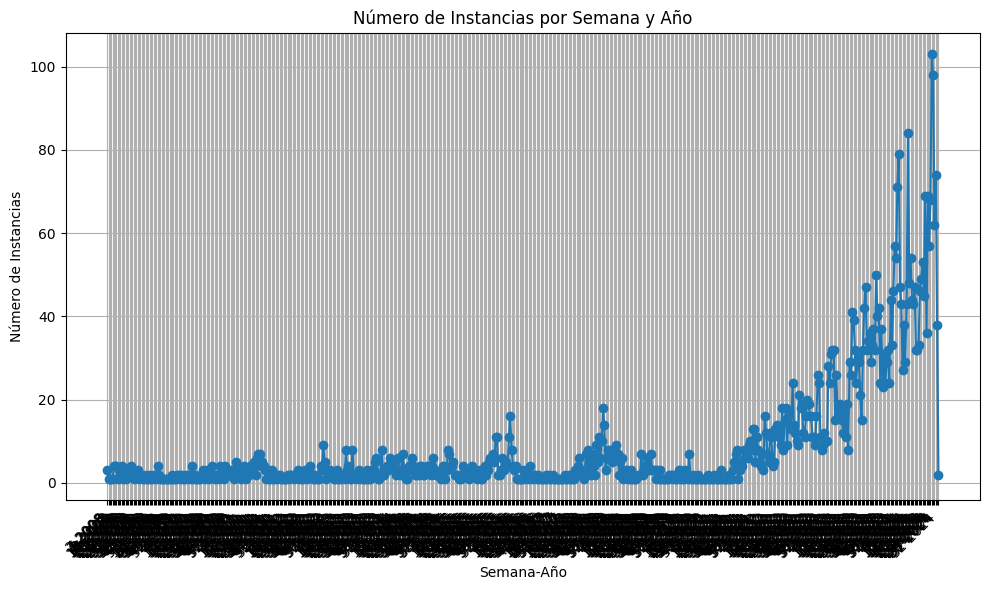

In [26]:
import matplotlib.pyplot as plt

# Crear etiquetas combinando semana3 y año3 para el eje horizontal
df3['etiquetas'] = df3['semana3'].astype(str) + '-' + df3['año3'].astype(str)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(df3['etiquetas'], df3['numero_de_casos'], marker='o')

# Etiquetas y título
plt.xlabel('Semana-Año')
plt.ylabel('Número de Instancias')
plt.title('Número de Instancias por Semana y Año')

# Rotar etiquetas en el eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right')

# Mostrar la cuadrícula
plt.grid(True)

# Mostrar el gráfico
plt.tight_layout()

plt.savefig('casos_vs_semana_epidemiologica.jpg')

plt.show()

